<a href="https://colab.research.google.com/github/LeeSeungwon89/Lecture-and-self-study/blob/master/CHAPTER2%20%EC%A7%80%EB%8F%84%20%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지도 학습은 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용함. 즉 훈련 세트로부터 머신러닝 모델을 만듦. 우리의 목표는 이전에 본 적 없는 새로운 데이터에 대해 정확한 출력을 예측하는 것임. 지도 학습은 종종 데이터를 만드는 데 사람의 노력이 필요하지만 일단 자동화를 도모하면 힘들고 어려운 작업의 처리 속도를 제고할 수 있음.

# 2.1 분류와 회귀

 지도 학습에는 '분류(classification)'와 '회귀(regression)'가 있음.
 
 분류는 미리 정의된, 가능성 있는 여러 '클래스 레이블(class label)' 중에 하나를 예측하는 것임. 딱 두 개의 클래스로 분류하는 '이진 분류(binary classification)'와 셋 이상의 클래스로 분류하는 '다중 분류(multiclass classification)'로 나뉨. 1장에서 붓꽃을 세 품종 중 하나로 분류하는 문제는 붓꽃 품종이 3개이므로 다중 분류 문제임. 

 이진 분류는 질문의 답이 예와 아니오만 나올 수 있게 하는 것임. 이메일에서 스팸을 분류하는 것이 대표적인 예이며 예/아니오 대답에 대한 질문은 "이 이메일은 스팸인가요?" 가 됨. 한 클래스를 양성(positive) 클래스, 다른 하나를 음성(negative) 클래스라고 하는데, 양성 클래스는 학습하고자 하는 대상을 의미하므로 스팸 메일이 양성 클래스가 되는 것임. 다만 두 클래스 중에 어떤 것을 양성으로 정할지는 주관적인 문제이므로 분야에 따라 다름. 다른 예로는 웹사이트의 글을 사용하여 어떤 언어의 웹사이트인지 예측하는 문제가 있는데, 이 문제에서 클래스는 미리 만들어놓은 언어 목록임.

 회귀는 연속적인 숫자, 또는 프로그래밍 용어로 말하면 '부동소수점수(수학 용어로는 실수)'를 예측하는 것임. 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것이 회귀 문제의 한 예임. 소득을 예측할 때 예측된 값은 어떤 양으로서, 일정 범위 안의 어떤 숫자도 될 수 있음. 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수 등로 올해 수확량을 예측하는 예도 회귀 문제이며 수확양 또한 어떤 숫자든 가능함.

 출력 값에 연속성이 있는지 질문하면 회귀와 분류 문제를 쉽게 구분할 수 있음. 예상 출력 값 사이에 연속성이 있다면 회귀 문제임. 연소득을 예측하는 경우 출력에 확연한 연속성이 존재하는데, 어떤 사람이 1년에 40,000,000원 또는 40,000,001원을 벌 수 있다면  그 양은 분명 다르지만 큰 차이는 아님. 즉 우리 알고리즘이 40,000,000원을 예측해야 하는데 39,999,999원이나 40,000,001원을 예측했다고 해도 큰 문제가 되지 않음.

 반대로 분류 문제로서 웹사이트가 어떤 언어로 구성되어 있는지 인식하는 작업에는 정도란 것이 존재할 수가 없음. 한 언어가 아니면 다른 언어임. 언어 사이에는 연속성이 없고 영어와 프랑스어 사이에 다른 언어는 없음. 물론 언어를 독립적이고 고정된 것으로 표현하는 것은 무리가 있음. 

# 2.2 일반화, 과대적합, 과소적합

 지도 학습에서는 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면 처음 보는 새로운 데이터가 주어져도 정확히 예측할 것으로 기대함. 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화(generalization)되었다고 함. 그래서 모델을 만들 때는 가능한 한 정확하게 일반화되도록 해야 함.

 보통 훈련 세트에 대해 정확하게 예측하도록 모델을 구축함. 훈련 세트와 테스트 세트가 매우 비슷하면 그 모델이 테스트 세트에서도 정확하게 예측할 것으로 기대할 수 있음. 하지만 항상 그런 것도 아닌데, 예를 들어 아주 복잡한 모델을 만들면 훈련 세트에만 정확한 모델이 될 가능성도 있음.

 가상의 예를 만들어 봄. 요트를 구매한 고객과 구매 의사가 없는 고객의 데이터를 활용하여 누가 요트를 살지 예측하려고 함. 무관심한 고객들이 아닌 실제로 구매할 것 같은 고객들에게만 홍보 메일을 보내는 것이 목표임. 다만 이게 좀 까다로운 문제인 이유는 아직 요트를 사지 않았다고 알고 있던 고객이 사실 다른 곳에서 요트를 샀을지도 모르고, 나중에 요트를 사려고 저축하거나 계획해뒀을 수도 있다는 것임.

 아래는 고객 샘플 데이터임. 출처는 파이썬 라이브러리를 활용한 머신러닝(번역개정판).
 <img src='https://drive.google.com/uc?export=view&id=1TMAwRvCh9gsF2kiUOpl35nyhA5nA0o5X' width = 70% >

 이 데이터를 활용하여 새로운 고객이 요트를 구매할 것인가에 대한 질문에 만족할 만한 답을 줄 수 있는 모델을 만들어야 함. 새로운 고객에도 잘 작동하는 규칙을 찾아야 하므로 훈련 세트에서 100% 정확도를 달성하는 것은 크게 도움이 되지 않음. 테스트 세트를 따로 활용하여 훈련 세트와 테스트 세트의 정확도를 가장 근접한 지점까지 맞춰야 함. 우리가 예측하려는 대상은 이 데이터셋이 아니라 새로운 고객이기 때문임. 알고리즘이 새로운 데이터도 잘 처리하는지 측정하는 방법은 테스트 세트로 모델을 평가하는 수밖에 없음.
 
 직관적으로 이 데이터를 보면 간단한 모델이 새로운 데이터에 더 잘 일반화될 것이라고 예상할 수 있음. 예를 들면 "50세 이상인 사람은 보트를 사려고 한다." 라는 규칙을 만들었다면 이 규칙은 모든 고객 데이터를 만족시킬 뿐만 아니라, 나이 외에 자녀 수나 혼인 상태를 추가한 규칙보다 더 신뢰할 수 있음. 그러므로 항상 간단한 모델만 찾으려는 늪에 스스로 빠지는 것임.

 주목해야 할 점은 '과대적합(overfitting)'과 '과소적합(underfitting)'이 일어나지 않도록 일반화 성능이 최대가 되는 최적점에 있는 모델을 만들어야 한다는 것임. '과대적합'은 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 의미하며 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어나는 현상임. 반면에 과소적합은 너무 간단한 모델을 만드는 것을 의미하며 "주택을 보유한 사람은 모두 요트를 사려고 한다." 와 같은 규칙만을 적용하면 데이터의 면면과 다양성을 잡아내지 못하고 훈련 세트에도 잘 맞지 않을 것임. 

 정리하자면 모델을 복잡하게 할수록 훈련 데이터에 대해서는 더 정확하게 예측할 수 있으나 너무 복잡해지면 훈련 세트의 각 데이터 포인트에 너무 민감해져서 새로운 데이터에 잘 일반화되지 않음. 우리가 찾으려는 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델임.

과대적합과 과소적합의 절충점을 아래 그림에서 나타냄. 출처는 파이썬 라이브러리를 활용한 머신러닝(번역개정판).
 <img src='https://drive.google.com/uc?export=view&id=1G_gq95m6NAtmuVcs90CKCBBwozynDMys' width = 70% >



## 2.2.1 모델 복잡도와 데이터셋 크기의 관계

 모델 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊음. 데이터셋에 다양한 데이터 포인트가 많을수록 과대적합 없이 더 복잡한 모델을 만들 수 있음. 보통 데이터 포인트를 더 많이 모으는 것이 다양성을 키워주므로 큰 데이터셋은 더 복잡한 모델을 만들 수 있게 함. 그러나 같은 데이터 포인트를 중복하거나 매우 비슷한 데이터를 모으는 것은 도움이 되지 않음.

 위 요트 판매 예로 돌아가면, 고객 데이터를 10,000개 모았더니 전부 "45세 이상이고 자녀가 셋 미만이며 이혼하지 않는 고객은 요트를 사려고 한다." 라는 규칙을 만족한다면 위 [표 2-1]의 12개만 사용할 때보다 훨씬 좋은 규칙이라고 할 수 있음.

 데이터를 더 많이 수집하고 적절하게 더 복잡한 모델을 만들면 지도 학습 문제에서 종종 놀라운 결과를 얻을 수 있음. 이 책에서는 고정 크기의 데이터셋을 사용하는 데 집중함. 모델을 변경하거나 조정하는 것보다 이득일 수 있으므로 실제 환경에서는 데이터를 얼마나 많이 모을지 정해야 함. 

# 2.3 지도 학습 알고리즘

 각 알고리즘을 자세히 설명하는 내용을 모두 읽을 필요는 없지만 모델을 이해하면 여러 머신러닝 알고리즘의 작동 방식을 더 잘 알 수 있음. 

## 2.3.1 예제에 사용할 데이터셋

 여러 알고리즘을 설명하기 위해 데이터셋도 여러 개 사용함. 어떤 데이터셋은 작고 인위적으로 만든 것이며, 알고리즘의 특징을 부각하기 위해 만든 것도 있음. 실제 샘플로 만든 큰 데이터셋도 있음.

 두 개의 특성을 가진 forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋임. 다음 코드는 이 데이터셋의 모든 데이터 포인트를 산점도로 그림. x축은 첫 번째 특성, y축은 두 번째 특성임. 모든 산점도가 그렇듯이 점 하나가 각 데이터 포인트를 나타냄. 점의 색과 모양은 데이터 포인트가 속한 클래스를 나타냄.

In [6]:
pip install mglearn

     |████████████████████████████████| 540 kB 4.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=aa3035dc75a34fbf928a0ab62d3ad85318201df6204b3bf071091d9d046fb0ef
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [7]:
# 라이브러리를 임포트 함.
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
X.shape: (26, 2)


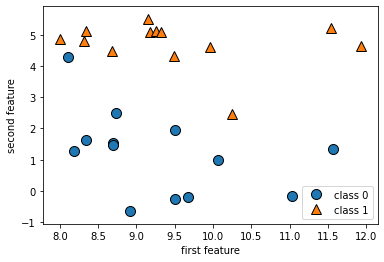

In [24]:
# 데이터셋을 만듦.
X, y = mglearn.datasets.make_forge()
print(X, y)

# 산점도를 그림.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['class 0', 'class 1'], loc=4)
plt.xlabel('first feature')
plt.ylabel('second feature')

print('X.shape:', X.shape)
# 데이터 포인트 26개, 특성 2개를 가짐.

## 2.3.2 k-최근접 이웃

## 2.3.3 선형 모델

## 2.3.4 나이브 베이즈 분류기

## 2.3.5 결정 트리

## 2.3.6 결정 트리의 앙상블

## 2.3.7 배깅, 엑스트라 트리, 에이다부스트

## 2.3.8 커널 서포트 벡터 머신

## 2.3.9 신경망(딥러닝)

생략 예정.

# 2.4 분류 예측의 불확실성 추정

## 2.4.1 결정 함수

## 2.4.2 예측 확률

##2.4.3 다중 분류에서의 불확실성

# 2.5 요약 및 정리